In [1]:
import warnings
warnings.filterwarnings("ignore")

# K均值聚类（K-means）

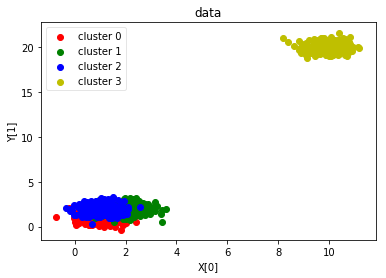

In [5]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import numpy as np
# 生成用于聚类的数据集
def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true
# 绘制用于聚类的数据集
def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    :return: None
    '''
    X,labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label,
		color=colors[i%len(colors)])

    ax.legend(loc="best",framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()
# 预生成数据
centers=[[1,1],[2,2],[1,2],[10,20]] # 用于产生聚类的中心点
X,labels_true=create_data(centers,1000,0.5) # 产生用于聚类的数据集
# 绘制用于聚类的数据集
plot_data(X,labels_true) 

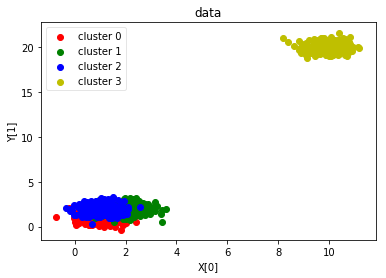

In [6]:
plot_data(X,labels_true) 

In [7]:
from sklearn import  cluster
from sklearn.metrics import adjusted_rand_score
# 测试 KMeans 的用法
def test_Kmeans(*data):
    X,labels_true=data
    clst=cluster.KMeans()
    clst.fit(X)
    predicted_labels=clst.predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true,predicted_labels))
    print("Sum center distance %s"%clst.inertia_)
test_Kmeans(X,labels_true) 

ARI:0.3781667388289657
Sum center distance 239.78268860862028


In [8]:
clst=cluster.KMeans()
??clst

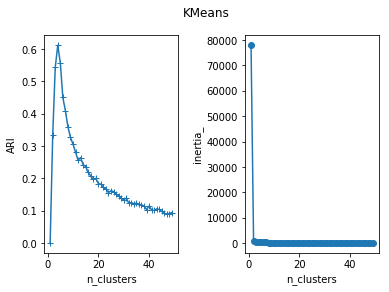

In [10]:
# 测试 KMeans 的聚类结果随 n_clusters 参数的影响
def test_Kmeans_nclusters(*data):
    X,labels_true=data
    nums=range(1,50)
    ARIs=[]
    Distances=[]
    for num in nums:
        clst=cluster.KMeans(n_clusters=num)
        clst.fit(X)
        predicted_labels=clst.predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances.append(clst.inertia_)

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs,marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums,Distances,marker='o')
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("inertia_")
    fig.suptitle("KMeans")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
test_Kmeans_nclusters(X,labels_true) 

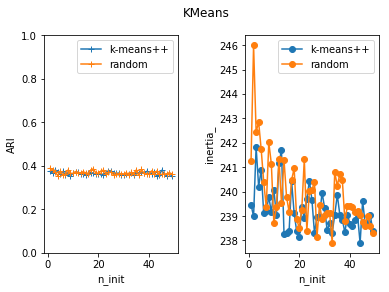

In [11]:
# 测试 KMeans 的聚类结果随 n_init 和 init  参数的影响
def test_Kmeans_n_init(*data):
    X,labels_true=data
    nums=range(1,50)
    ## 绘图
    fig=plt.figure()

    ARIs_k=[]
    Distances_k=[]
    ARIs_r=[]
    Distances_r=[]
    for num in nums:
            clst=cluster.KMeans(n_init=num,init='k-means++')
            clst.fit(X)
            predicted_labels=clst.predict(X)
            ARIs_k.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_k.append(clst.inertia_)

            clst=cluster.KMeans(n_init=num,init='random')
            clst.fit(X)
            predicted_labels=clst.predict(X)
            ARIs_r.append(adjusted_rand_score(labels_true,predicted_labels))
            Distances_r.append(clst.inertia_)
    ax=fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs_k,marker="+",label="k-means++")
    ax.plot(nums,ARIs_r,marker="+",label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("ARI")
    ax.set_ylim(0,1)
    ax.legend(loc='best')
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums,Distances_k,marker='o',label="k-means++")
    ax.plot(nums,Distances_r,marker='o',label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("inertia_")
    ax.legend(loc='best')
    fig.suptitle("KMeans")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
test_Kmeans_n_init(X,labels_true) 

# 密度聚类（DBSCAN）

In [9]:
# 测试 DBSCAN 的用法
def test_DBSCAN(*data):
    X,labels_true=data
    clst=cluster.DBSCAN()
    predicted_labels=clst.fit_predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true,predicted_labels))
    print("Core sample num:%d"%len(clst.core_sample_indices_))
test_DBSCAN(X,labels_true) 

ARI:0.33266295633085957
Core sample num:992


In [10]:
clst=cluster.DBSCAN()
??clst

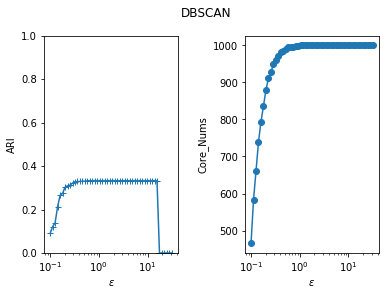

In [12]:
# 测试 DBSCAN 的聚类结果随epsilon参数的影响
def test_DBSCAN_epsilon(*data):
    X,labels_true=data
    epsilons=np.logspace(-1,1.5)
    ARIs=[]
    Core_nums=[]
    for epsilon in epsilons:
        clst=cluster.DBSCAN(eps=epsilon)
        predicted_labels=clst.fit_predict(X)
        ARIs.append( adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(epsilons,ARIs,marker='+')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')

    ax=fig.add_subplot(1,2,2)
    ax.plot(epsilons,Core_nums,marker='o')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel('Core_Nums')
    fig.suptitle("DBSCAN")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
test_DBSCAN_epsilon(X,labels_true) 

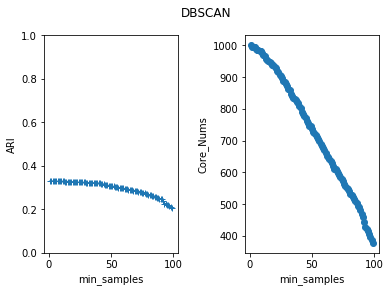

In [13]:
# 测试 DBSCAN 的聚类结果随  min_samples 参数的影响
def test_DBSCAN_min_samples(*data):
    X,labels_true=data
    min_samples=range(1,100)
    ARIs=[]
    Core_nums=[]
    for num in min_samples:
        clst=cluster.DBSCAN(min_samples=num)
        predicted_labels=clst.fit_predict(X)
        ARIs.append( adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(min_samples,ARIs,marker='+')
    ax.set_xlabel( "min_samples")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')
    ax=fig.add_subplot(1,2,2)
    ax.plot(min_samples,Core_nums,marker='o')
    ax.set_xlabel( "min_samples")
    ax.set_ylabel('Core_Nums')
    fig.suptitle("DBSCAN")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
test_DBSCAN_min_samples(X,labels_true) 

# 层次聚类（AgglomerativeClustering）

In [13]:
#  测试 AgglomerativeClustering 的用法
def test_AgglomerativeClustering(*data):
    X,labels_true=data
    clst=cluster.AgglomerativeClustering()
    predicted_labels=clst.fit_predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true,predicted_labels))
test_AgglomerativeClustering(X,labels_true) 

ARI:0.33266533066132264


In [14]:
clst=cluster.AgglomerativeClustering()
??clst

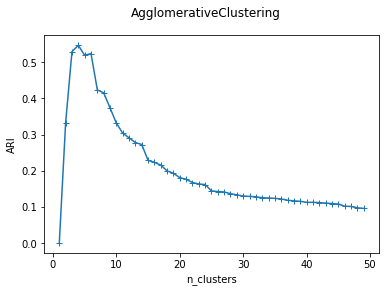

In [15]:
# 测试 AgglomerativeClustering 的聚类结果随 n_clusters 参数的影响
def test_AgglomerativeClustering_nclusters(*data):
    X,labels_true=data
    nums=range(1,50)
    ARIs=[]
    for num in nums:
        clst=cluster.AgglomerativeClustering(n_clusters=num)
        predicted_labels=clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(nums,ARIs,marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    fig.suptitle("AgglomerativeClustering")
    plt.show()
test_AgglomerativeClustering_nclusters(X,labels_true) 

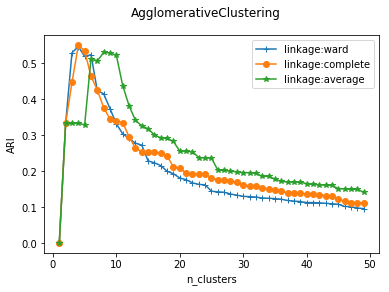

In [17]:
# 测试 AgglomerativeClustering 的聚类结果随链接方式的影响
def test_AgglomerativeClustering_linkage(*data):
    X,labels_true=data
    nums=range(1,50)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linkages=['ward','complete','average']
    markers="+o*"
    for i, linkage in enumerate(linkages):
        ARIs=[]
        for num in nums:
            clst=cluster.AgglomerativeClustering(n_clusters=num,linkage=linkage)
            predicted_labels=clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="linkage:%s"%linkage)

    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax.legend(loc="best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()
test_AgglomerativeClustering_linkage(X,labels_true) 

# 高斯混合聚类（Mixture Gaussian）

In [19]:
from sklearn import mixture
# 测试 GMM 的用法
def test_GMM(*data):
    X,labels_true=data
    clst=mixture.GaussianMixture()
    clst.fit(X)
    predicted_labels=clst.predict(X)
    print("ARI:%s"% adjusted_rand_score(labels_true,predicted_labels))
test_GMM(X,labels_true) 

ARI:0.0


In [21]:
clst=mixture.GaussianMixture()
??clst

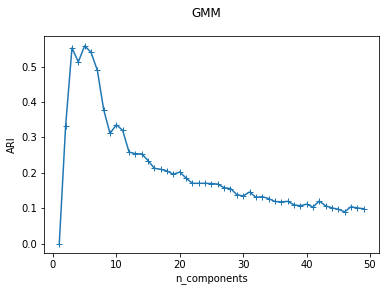

In [22]:
# 测试 GMM 的聚类结果随 n_components 参数的影响
def test_GMM_n_components(*data):
    X,labels_true=data
    nums=range(1,50)
    ARIs=[]
    for num in nums:
        clst=mixture.GaussianMixture(n_components=num)
        clst.fit(X)
        predicted_labels=clst.predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(nums,ARIs,marker="+")
    ax.set_xlabel("n_components")
    ax.set_ylabel("ARI")
    fig.suptitle("GMM")
    plt.show()
test_GMM_n_components(X,labels_true) 

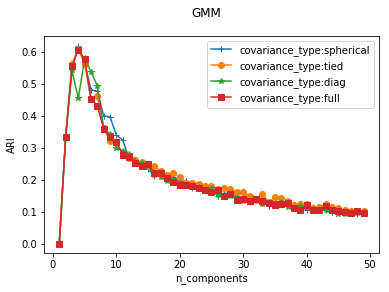

In [23]:
# 测试 GMM 的聚类结果随协方差类型的影响
def test_GMM_cov_type(*data):
    X,labels_true=data
    nums=range(1,50)

    cov_types=['spherical','tied','diag','full']
    markers="+o*s"
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    for i ,cov_type in enumerate(cov_types):
        ARIs=[]
        for num in nums:
            clst=mixture.GaussianMixture(n_components=num,covariance_type=cov_type)
            clst.fit(X)
            predicted_labels=clst.predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="covariance_type:%s"%cov_type)

    ax.set_xlabel("n_components")
    ax.legend(loc="best")
    ax.set_ylabel("ARI")
    fig.suptitle("GMM")
    plt.show()
test_GMM_cov_type(X,labels_true) 

# K选择

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1657E0668>,
         k=None, metric=None, model=None, timings=True)

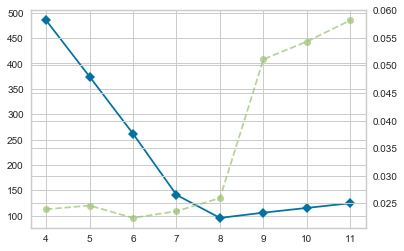

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
# 构造数据
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
# I实例化类
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F165BD9C88>,
           model=None)

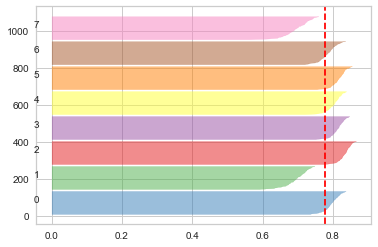

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
# 构造数据
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001F165C584A8>,
           embedding='mds', legend=True, legend_loc='lower left',
           legend_size=1.5, max_size=25000, min_size=400, model=None,
           random_state=None, scoring='membership')

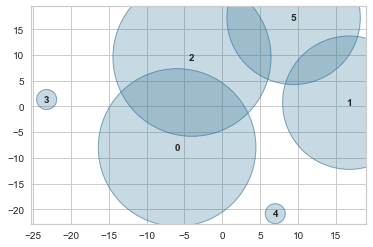

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# 簇间距离
from yellowbrick.cluster import InterclusterDistance
# 构造数据
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)
# 实例化类
model = KMeans(6)
visualizer = InterclusterDistance(model)
visualizer.fit(X)